<a href="https://colab.research.google.com/github/LiroyGenkins/word2vec/blob/main/%22Word2vec_emoji_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование векторных представлений эмотиконов

Загрузка корпуса текстов, содержащих предложения как со словами, так и эмотиконами. Кодировка текста - utf-8.

Разделениее предложения по словам, считая эмотикон отдельным словом. В корпусе  ровно 1000000 предложений.

In [ ]:
import os
from time import time
import gdown
URL='https://drive.google.com/u/1/uc?id=1TPaQTYDpf7p2EklUkLdjK9T5ATztj7oF&export=download'
gdown.download(url=URL)
!unzip corpus.zip

Downloading...
From: https://drive.google.com/u/1/uc?id=1TPaQTYDpf7p2EklUkLdjK9T5ATztj7oF&export=download
To: /content/corpus.zip
100%|██████████| 22.0M/22.0M [00:00<00:00, 81.6MB/s]


Archive:  corpus.zip
  inflating: corpus.txt              


In [ ]:
# читаем файл и разбиваем на слова
corp = open('corpus.txt', 'r', encoding='utf-8')
sent = [l for l in corp]
words = [l.split() for l in sent]
print(sent[:10])
print(words[:50])

['they know what i love 😊\n', 'lemme get to school 🙄\n', 'watching the ellen degeneres show 😃\n', "i spent twenty minutes herding turkeys by myself so that's how my days going 🦃\n", 'hello seattle cityscape 🏗\n', 'was that a sheep brain in your snap 👀\n', 'just waiting for my beard to connect so i can go to my third form 🙄\n', 'aye i tried my best to get him out loser dan 😝\n', 'day tracking our next ep down 👏\n', "hey it's my birthday i'm could you say happy birthday flo 🎉 x8\n"]
[['they', 'know', 'what', 'i', 'love', '😊'], ['lemme', 'get', 'to', 'school', '🙄'], ['watching', 'the', 'ellen', 'degeneres', 'show', '😃'], ['i', 'spent', 'twenty', 'minutes', 'herding', 'turkeys', 'by', 'myself', 'so', "that's", 'how', 'my', 'days', 'going', '🦃'], ['hello', 'seattle', 'cityscape', '🏗'], ['was', 'that', 'a', 'sheep', 'brain', 'in', 'your', 'snap', '👀'], ['just', 'waiting', 'for', 'my', 'beard', 'to', 'connect', 'so', 'i', 'can', 'go', 'to', 'my', 'third', 'form', '🙄'], ['aye', 'i', 'tried', '

Эмотиконы представлены в виде символов UNICODE с определенными кодами. Функция ниже позволяет проверить, является ли символ или слово эмотиконом.

In [ ]:
# Проверка, является ли токен эмотиконом
import re
emoji_re = re.compile(
    "["
    u"\U00002712\U00002714\U00002716\U0000271d\U00002721\U00002728\U00002733\U00002734\U00002744\U00002747\U0000274c\U0000274e\U00002753-\U00002755\U00002757\U00002763\U00002764\U00002795-\U00002797\U000027a1\U000027b0\U000027bf\U00002934\U00002935\U00002b05-\U00002b07\U00002b1b\U00002b1c\U00002b50\U00002b55\U00003030\U0000303d\U0001f004\U0001f0cf\U0001f170\U0001f171\U0001f17e\U0001f17f\U0001f18e\U0001f191-\U0001f19a\U0001f201\U0001f202\U0001f21a\U0001f22f\U0001f232-\U0001f23a\U0001f250\U0001f251\U0001f300-\U0001f321\U0001f324-\U0001f393\U0001f396\U0001f397\U0001f399-\U0001f39b\U0001f39e-\U0001f3f0\U0001f3f3-\U0001f3f5\U0001f3f7-\U0001f4fd\U0001f4ff-\U0001f53d\U0001f549-\U0001f54e\U0001f550-\U0001f567\U0001f56f\U0001f570\U0001f573-\U0001f579\U0001f587\U0001f58a-\U0001f58d\U0001f590\U0001f595\U0001f596\U0001f5a5\U0001f5a8\U0001f5b1\U0001f5b2\U0001f5bc\U0001f5c2-\U0001f5c4\U0001f5d1-\U0001f5d3\U0001f5dc-\U0001f5de\U0001f5e1\U0001f5e3\U0001f5ef\U0001f5f3\U0001f5fa-\U0001f64f\U0001f680-\U0001f6c5\U0001f6cb-\U0001f6d0\U0001f6e0-\U0001f6e5\U0001f6e9\U0001f6eb\U0001f6ec\U0001f6f0\U0001f6f3\U0001f910-\U0001f918\U0001f980-\U0001f984\U0001f9c0\U00003297\U00003299\U000000a9\U000000ae\U0000203c\U00002049\U00002122\U00002139\U00002194-\U00002199\U000021a9\U000021aa\U0000231a\U0000231b\U00002328\U00002388\U000023cf\U000023e9-\U000023f3\U000023f8-\U000023fa\U000024c2\U000025aa\U000025ab\U000025b6\U000025c0\U000025fb-\U000025fe\U00002600-\U00002604\U0000260e\U00002611\U00002614\U00002615\U00002618\U0000261d\U00002620\U00002622\U00002623\U00002626\U0000262a\U0000262e\U0000262f\U00002638-\U0000263a\U00002648-\U00002653\U00002660\U00002663\U00002665\U00002666\U00002668\U0000267b\U0000267f\U00002692-\U00002694\U00002696\U00002697\U00002699\U0000269b\U0000269c\U000026a0\U000026a1\U000026aa\U000026ab\U000026b0\U000026b1\U000026bd\U000026be\U000026c4\U000026c5\U000026c8\U000026ce\U000026cf\U000026d1\U000026d3\U000026d4\U000026e9\U000026ea\U000026f0-\U000026f5\U000026f7-\U000026fa\U000026fd\U00002702\U00002705\U00002708-\U0000270d\U0000270f]|[#]\U000020e3|[*]\U000020e3|[0]\U000020e3|[1]\U000020e3|[2]\U000020e3|[3]\U000020e3|[4]\U000020e3|[5]\U000020e3|[6]\U000020e3|[7]\U000020e3|[8]\U000020e3|[9]\U000020e3|\U0001f1e6[\U0001f1e8-\U0001f1ec\U0001f1ee\U0001f1f1\U0001f1f2\U0001f1f4\U0001f1f6-\U0001f1fa\U0001f1fc\U0001f1fd\U0001f1ff]|\U0001f1e7[\U0001f1e6\U0001f1e7\U0001f1e9-\U0001f1ef\U0001f1f1-\U0001f1f4\U0001f1f6-\U0001f1f9\U0001f1fb\U0001f1fc\U0001f1fe\U0001f1ff]|\U0001f1e8[\U0001f1e6\U0001f1e8\U0001f1e9\U0001f1eb-\U0001f1ee\U0001f1f0-\U0001f1f5\U0001f1f7\U0001f1fa-\U0001f1ff]|\U0001f1e9[\U0001f1ea\U0001f1ec\U0001f1ef\U0001f1f0\U0001f1f2\U0001f1f4\U0001f1ff]|\U0001f1ea[\U0001f1e6\U0001f1e8\U0001f1ea\U0001f1ec\U0001f1ed\U0001f1f7-\U0001f1fa]|\U0001f1eb[\U0001f1ee-\U0001f1f0\U0001f1f2\U0001f1f4\U0001f1f7]|\U0001f1ec[\U0001f1e6\U0001f1e7\U0001f1e9-\U0001f1ee\U0001f1f1-\U0001f1f3\U0001f1f5-\U0001f1fa\U0001f1fc\U0001f1fe]|\U0001f1ed[\U0001f1f0\U0001f1f2\U0001f1f3\U0001f1f7\U0001f1f9\U0001f1fa]|\U0001f1ee[\U0001f1e8-\U0001f1ea\U0001f1f1-\U0001f1f4\U0001f1f6-\U0001f1f9]|\U0001f1ef[\U0001f1ea\U0001f1f2\U0001f1f4\U0001f1f5]|\U0001f1f0[\U0001f1ea\U0001f1ec-\U0001f1ee\U0001f1f2\U0001f1f3\U0001f1f5\U0001f1f7\U0001f1fc\U0001f1fe\U0001f1ff]|\U0001f1f1[\U0001f1e6-\U0001f1e8\U0001f1ee\U0001f1f0\U0001f1f7-\U0001f1fb\U0001f1fe]|\U0001f1f2[\U0001f1e6\U0001f1e8-\U0001f1ed\U0001f1f0-\U0001f1ff]|\U0001f1f3[\U0001f1e6\U0001f1e8\U0001f1ea-\U0001f1ec\U0001f1ee\U0001f1f1\U0001f1f4\U0001f1f5\U0001f1f7\U0001f1fa\U0001f1ff]|\U0001f1f4\U0001f1f2|\U0001f1f5[\U0001f1e6\U0001f1ea-\U0001f1ed\U0001f1f0-\U0001f1f3\U0001f1f7-\U0001f1f9\U0001f1fc\U0001f1fe]|\U0001f1f6\U0001f1e6|\U0001f1f7[\U0001f1ea\U0001f1f4\U0001f1f8\U0001f1fa\U0001f1fc]|\U0001f1f8[\U0001f1e6-\U0001f1ea\U0001f1ec-\U0001f1f4\U0001f1f7-\U0001f1f9\U0001f1fb\U0001f1fd-\U0001f1ff]|\U0001f1f9[\U0001f1e6\U0001f1e8\U0001f1e9\U0001f1eb-\U0001f1ed\U0001f1ef-\U0001f1f4\U0001f1f7\U0001f1f9\U0001f1fb\U0001f1fc\U0001f1ff]|\U0001f1fa[\U0001f1e6\U0001f1ec\U0001f1f2\U0001f1f8\U0001f1fe\U0001f1ff]|\U0001f1fb[\U0001f1e6\U0001f1e8\U0001f1ea\U0001f1ec\U0001f1ee\U0001f1f3\U0001f1fa]|\U0001f1fc[\U0001f1eb\U0001f1f8]|\U0001f1fd\U0001f1f0|\U0001f1fe[\U0001f1ea\U0001f1f9]|\U0001f1ff[\U0001f1e6\U0001f1f2\U0001f1fc"
    "]+",
    flags=re.UNICODE,
)
def is_emoji(word):
    if emoji_re.match(word[0]):
        return True
    else:
        return False


# Создание и обучение модели векторных представлений

Средствами библиотеки `gensim` создаём и обучаем Word2Vec модель на этом наборе токенов и создаём словарь всех токенов. Ограничим время обучения, чтобы оно не превосходило 5 минут. 

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# обучение модели
from gensim.models import Word2Vec
from time import time

model = Word2Vec(size=300, window=5, min_count=5, negative=5)

model.build_vocab(words)

In [ ]:
# число предложений в корпусе
len(sent)

1000000

In [ ]:
# обучаем модель ~ 5 минут
t = time()

model.train(words, total_examples=model.corpus_count, epochs=8)

print('Time to build vocab and train: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab and train: 3.49 mins


Отберём из словаря только эмотиконы. Они являются символами Unicode. Выведем на экран таблицу pandas со столбцами, содержащими эмотиконы и их коды.

In [ ]:
import pandas as pd

emoticons = [[s, ord(s[0])] for w in words for s in w if is_emoji(s)]
emojis = pd.DataFrame(emoticons, columns=['Emoticon', 'Code'])
print(emojis.shape)
print(emojis.head(10))

(1332736, 2)
  Emoticon    Code
0        😊  128522
1        🙄  128580
2        😃  128515
3        🦃  129411
4        🏗  127959
5        👀  128064
6        🙄  128580
7        😝  128541
8        👏  128079
9        🎉  127881


Проверим, что в словаре помимо эмотиконов есть и обычные слова, выведем на экран 10 первых слов из словаря.

In [ ]:
wv=model.wv
for index, word in enumerate(wv.index2word):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.index2word)} is {word}")

word #0/35362 is i
word #1/35362 is the
word #2/35362 is to
word #3/35362 is you
word #4/35362 is a
word #5/35362 is 😂
word #6/35362 is my
word #7/35362 is and
word #8/35362 is me
word #9/35362 is for


## 1. Похожесть эмотиконов
Посчитаем и выведем на экран 10 наиболее похожих токенов на эмотикон 😊. 

*Чек-поинт 1: Модель должна быть обучена так, чтобы среди похожих токенов эмотиконов было не менее 5.*

In [ ]:
wv.most_similar(positive=['😊'], topn=10)

[('😉', 0.5603892207145691),
 ('😀', 0.527306079864502),
 ('🙂', 0.5230365991592407),
 ('😌', 0.4832080006599426),
 ('😃', 0.4664827585220337),
 ('😄', 0.4572519361972809),
 ('😁', 0.44828736782073975),
 ('😇', 0.4284186065196991),
 ('👍', 0.41911211609840393),
 ('🙃', 0.4015786647796631)]

## 2. Похожесть слов на эмотиконы
Посчитаем и выведем на экран 10 наиболее похожих токенов на слово `cat`.

*Чек-поинт 2: Модель должна быть обучена так, чтобы среди похожих токенов был хотя бы 1 эмотикон.*

In [ ]:
res = wv.most_similar(positive=['cat'], topn=10)
res

[('dog', 0.6875452995300293),
 ('kitten', 0.6850659847259521),
 ('puppy', 0.5950530767440796),
 ('🐱', 0.5865548253059387),
 ('pup', 0.5815632939338684),
 ('kitty', 0.5719307661056519),
 ('cats', 0.571628749370575),
 ('pet', 0.5446639657020569),
 ('spider', 0.5215869545936584),
 ('tiny', 0.515106201171875)]

Среди похожих токенов из п.2 есть хотя бы 1 эмотикон. Для него выведем на экран 5 самых близких токенов.

In [ ]:
em = [r[0] for r in res if is_emoji(r[0])][0]
wv.most_similar(positive=em, topn=10)

[('pussy', 0.6105681657791138),
 ('cat', 0.5865548849105835),
 ('🍆', 0.5603448748588562),
 ('🐈', 0.526042103767395),
 ('meow', 0.5235880017280579),
 ('kitty', 0.5114997029304504),
 ('dick', 0.4987489581108093),
 ('😺', 0.49404871463775635),
 ('coochie', 0.4774124026298523),
 ('kitten', 0.47650784254074097)]

## 3. Отношения эмотиконов и слов

### А) 
Найдём ближайшее **слово** Х подходящее под уравнение: 

🐱 - 🐶 = cat - X

и не совпадающее ни с одним из исходных токенов, входящих в уравнение.

In [ ]:
X=wv['cat']-wv['🐱']+wv['🐶']
sim = wv.similar_by_vector(X)
[r for r in sim if not is_emoji(r[0]) and r[0] != 'cat'][0]

('puppy', 0.6241782903671265)

### Б)
 Найдём ближайший **эмотикон** Х подходящий под уравнение: 

cat - dog = 🐱 - X  

и не совпадающий ни с одним из исходных токенов, входящих в уравнение.

In [ ]:
X=wv['🐱']-wv['cat']+wv['dog']
sim = wv.similar_by_vector(X)
[r for r in sim if is_emoji(r[0]) and r[0] != '🐱'][0]

('🐶', 0.49126797914505005)

# 4.Проекции векторов эмотиконов на плоскость

Возьмём вектора **эмотиконов** и переведём эти вектора на плоскость, пользуясь методами PCA и TSNE по аналогии.

Нарисуем на плоскости миниатюры изображений эмотиконов, координаты этих изображений определяются полученными кооординатами векторов на плоскости.

*Matplotlib плохо работает с отображением эмотиконов как символов, поэтому придется найти способ получить их изображения. Это может быть медленно, для скорости имет смысл в отображении использовать N=1000 векторов эмотиконов.*
Общее время работы кода отображения не должно превышать 5 минут.

In [ ]:
import PIL
from IPython.display import Image

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity # похожесть по косинусному расстоянию.
from sklearn.decomposition import PCA # метод главных компонент
from sklearn.manifold import TSNE # метод TSNE
from sklearn.preprocessing import StandardScaler # масштабирование, убирает среднее, единичный разброс.

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import cv2

In [ ]:
gdown.download(url='https://fonts.google.com/download?family=Noto%20Emoji', output='Noto_Emoji.zip')
!unzip Noto_Emoji.zip

Downloading...
From: https://fonts.google.com/download?family=Noto%20Emoji
To: /content/Noto_Emoji.zip
4.12MB [00:00, 72.1MB/s]


Archive:  Noto_Emoji.zip
  inflating: OFL.txt                 
  inflating: static/NotoEmoji-Light.ttf  
  inflating: static/NotoEmoji-Regular.ttf  
  inflating: static/NotoEmoji-Medium.ttf  
  inflating: static/NotoEmoji-SemiBold.ttf  
  inflating: static/NotoEmoji-Bold.ttf  
  inflating: NotoEmoji-VariableFont_wght.ttf  
  inflating: README.txt              


In [ ]:
from PIL import Image, ImageFont, ImageDraw

images = []
image_vectors = []
j=0
for idx, e in enumerate(wv.vocab):
    if is_emoji(e) and j<1000:
      text = e
      image = Image.new("RGBA", (100,100), (255,255,255))
      font = ImageFont.truetype("NotoEmoji-VariableFont_wght.ttf", 60, encoding='unic')
      draw = ImageDraw.Draw(image)
      draw.text((0,0), text, (0,0,0), font=font)
      images += [image]
      image_vectors += [wv.get_vector(e)]
      j+=1


In [ ]:
X = np.stack(list(image_vectors))

pca_50 = PCA(n_components=50) #  первые 50 главных компонент
pca_result_50 = pca_50.fit_transform(X) # и проецируем на них
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
print(np.shape(pca_result_50))

# 2 компоненты  TSNE   
tsne = TSNE(n_components=2, verbose=1, n_iter=3000)
tsne_result = tsne.fit_transform(pca_result_50) # проецируем
tsne_result_scaled = StandardScaler().fit_transform(tsne_result) # масштабируем

Cumulative explained variation for 50 principal components: 0.7617043852806091
(961, 50)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 961 samples in 0.000s...
[t-SNE] Computed neighbors for 961 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 961 / 961
[t-SNE] Mean sigma: 0.735704


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.222389
[t-SNE] KL divergence after 2900 iterations: 1.078161


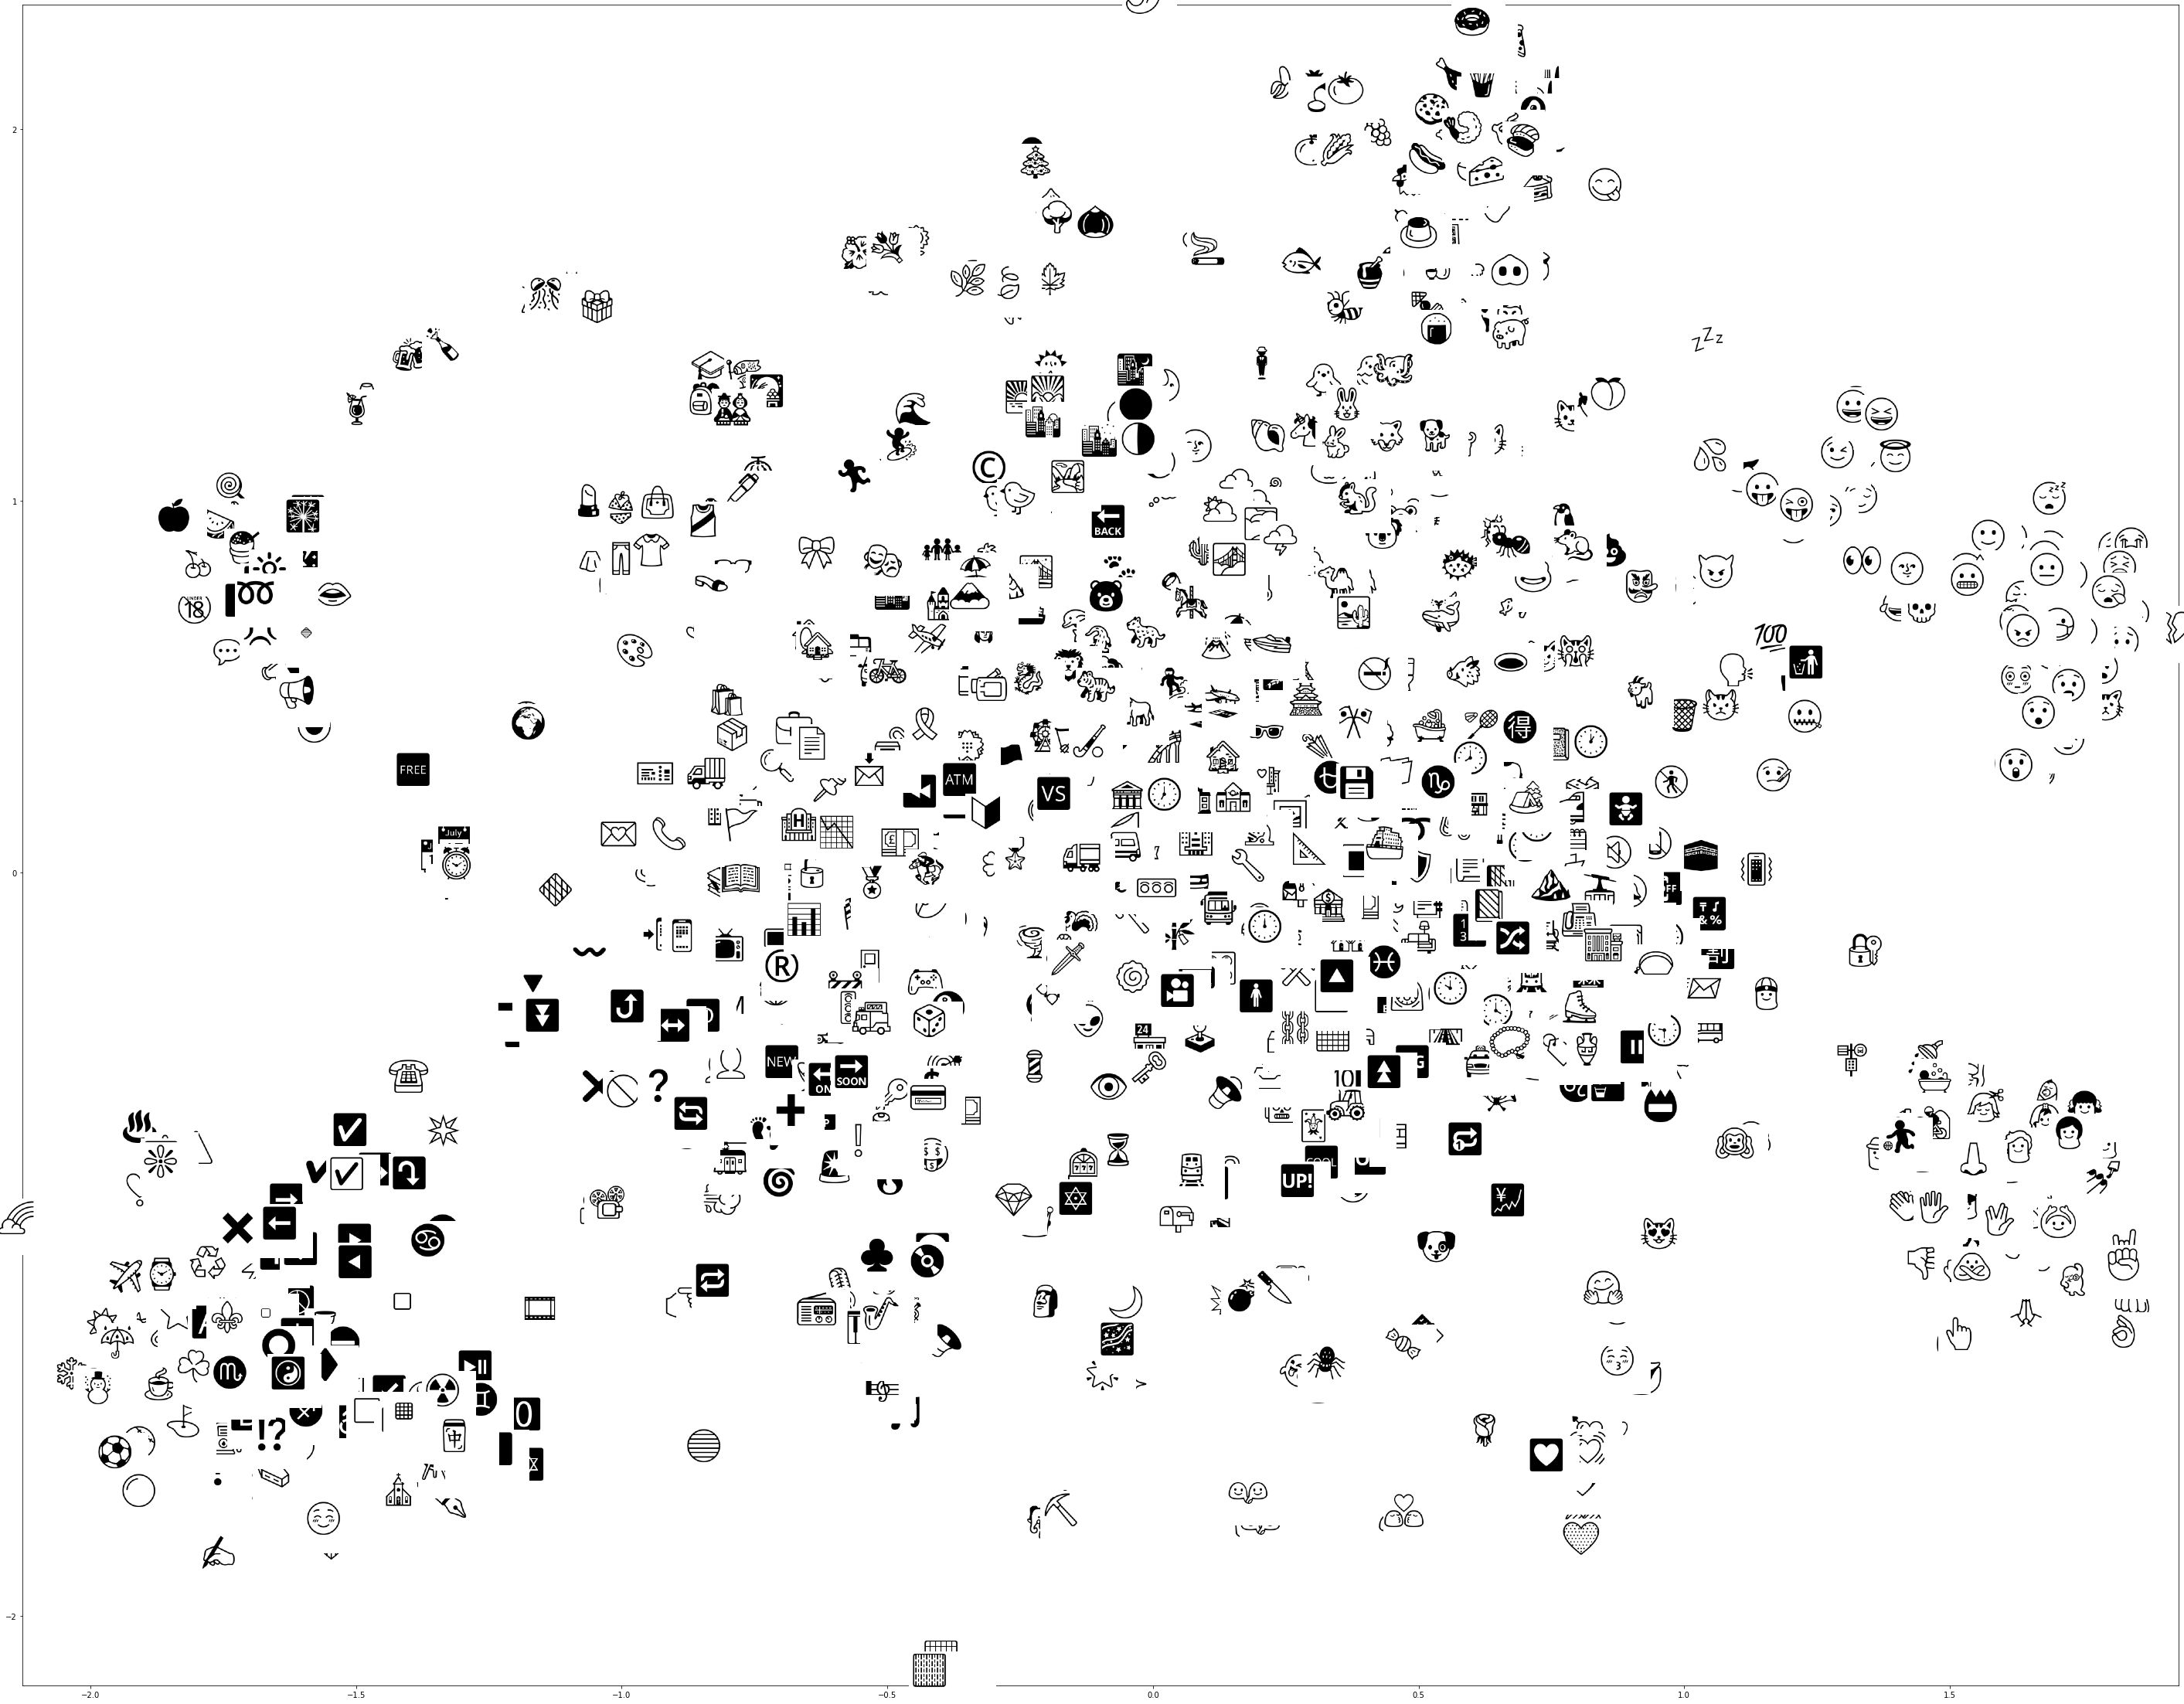

In [ ]:
# рисуем
fig, ax = plt.subplots(figsize=(50,40))
artists = []

for xy, i in zip(tsne_result_scaled, images): # перебираем TSNE вектора (это двумерные координаты) и изображения 
  x0, y0 = xy # разделяем горизонтальную и вертикальную координату
  img = OffsetImage(i, zoom=.7) # задаем графический объект с картинкой
  ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False) # вставляем эту картинку по координатам из вектора TSNE
  artists.append(ax.add_artist(ab)) # добавляем на график
ax.update_datalim(tsne_result_scaled) # пределы отображения
ax.autoscale(enable=True, axis='both', tight=True) # автомасштаб
plt.show() # отображаем

In [ ]:
print('\U0001f4af')
hex(ord('💯'))
chr(ord('💯'))

💯


'💯'